# Sentiment Analysis Data Exploration

In [5]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame.from_csv('./train.tsv', sep='\t')
print df.head()


          SentenceId                                             Phrase  \
PhraseId                                                                  
1                  1  A series of escapades demonstrating the adage ...   
2                  1  A series of escapades demonstrating the adage ...   
3                  1                                           A series   
4                  1                                                  A   
5                  1                                             series   

          Sentiment  
PhraseId             
1                 1  
2                 2  
3                 2  
4                 2  
5                 2  


In [6]:

print df.count()


SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64


In [27]:
sentiment = df.groupby(["Sentiment"])
print sentiment.count()


           SentenceId  Phrase
Sentiment                    
0                7072    7072
1               27273   27273
2               79582   79582
3               32927   32927
4                9206    9206


In [36]:
sentiment_0 = len(df[df["Sentiment"] == 0])
sentiment_1 = len(df[df["Sentiment"] == 1])
sentiment_2 = len(df[df["Sentiment"] == 2])
sentiment_3 = len(df[df["Sentiment"] == 3])
sentiment_4 = len(df[df["Sentiment"] == 4])
print sentiment_0
print sentiment_1
print sentiment_2
print sentiment_3
print sentiment_4


7072
27273
79582
32927
9206


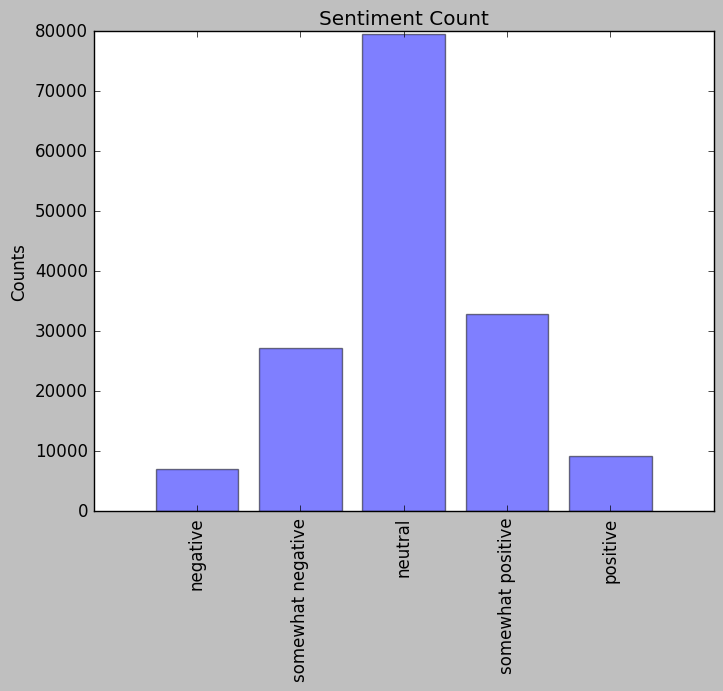

In [42]:
sentiment = [0, 1, 2, 3, 4]
label = ["negative", "somewhat negative", "neutral", "somewhat positive", "positive"]

count = [sentiment_0, sentiment_1, sentiment_2, sentiment_3, sentiment_4]
 
plt.bar(sentiment, count, align='center', alpha=0.5)
plt.xticks(sentiment, label, rotation='vertical')
plt.ylabel('Counts')
plt.ylabel('Counts')
plt.title('Sentiment Count')
plt.show()

### Neural sentiment has the most frequency

In [47]:
sentenceId = df.groupby(["SentenceId"])
print sentenceId['Phrase'].count().mean()

18.2975729863


### Every sentence has average around 18 phrases

In [86]:
totalSentenceNumber = len(sentenceId.count())
print totalSentenceNumber

8529


### Total sentence number

In [91]:
def findFullSentence(id):
    max = 0;
    maxContent = ""

    for info in df[df["SentenceId"] == id].iterrows():
        if (len(info[1]['Phrase']) > max):
            max = len(info[1]['Phrase'])
            maxContent = info[1]['Phrase']
    return maxContent

text = ""
for i in range(totalSentenceNumber):
    content = findFullSentence(i)
    text += (" " + content)
from collections import Counter
dictionary = Counter(text.split())
print dictionary.most_common()

[('.', 7929), (',', 7075), ('the', 5987), ('and', 4386), ('a', 4366), ('of', 4341), ('to', 2973), ("'s", 2519), ('is', 2511), ('that', 1899), ('in', 1773), ('it', 1762), ('The', 1248), ('as', 1191), ('film', 1137), ('but', 1070), ('with', 1063), ('for', 959), ('movie', 954), ('its', 901), ('A', 873), ('an', 767), ('you', 756), ('this', 738), ("n't", 678), ('be', 666), ('It', 642), ('...', 633), ('on', 621), ('not', 540), ('by', 521), ('--', 508), ('are', 505), ('about', 502), ('has', 496), ('more', 492), ('than', 471), ('from', 466), ('one', 464), ('at', 460), ('have', 451), ('his', 425), ('I', 422), ('like', 421), ('all', 413), ("'", 406), ('or', 368), ('so', 364), ('-RRB-', 352), ('-LRB-', 352), ('story', 341), ('who', 304), ('into', 295), ('out', 290), ('does', 289), ('too', 286), ('up', 280), ('most', 277), ('``', 266), ("''", 265), ('just', 258), ('will', 256), ('`', 254), ('can', 253), ('This', 253), ('good', 252), ('much', 248), ('comedy', 246), ('if', 238), ('characters', 233),